In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
%matplotlib inline

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

<h1>Importation des jeux de données</h1>

In [63]:
vehicule = pd.read_csv(r"C:\Users\maill\Downloads\vehicules.csv",sep=',')
vehicule.head()

C:\Users\maill\AppData\Local\Temp\ipykernel_5432\863509142.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicule = pd.read_csv(r"C:\Users\maill\Downloads\vehicules.csv",sep=',')


,Unnamed: 0,num_acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,annee,id_vehicule,motor
0,1,200500000001,0.0,7,0.0,0.0,2.0,1.0,1.0,A01,2005,NaN,NaN
1,2,200500000001,0.0,7,0.0,0.0,2.0,8.0,10.0,B02,2005,NaN,NaN
2,3,200500000002,0.0,7,0.0,0.0,2.0,7.0,16.0,A01,2005,NaN,NaN
3,4,200500000002,0.0,2,0.0,0.0,2.0,1.0,1.0,B02,2005,NaN,NaN
4,5,200500000003,0.0,2,0.0,0.0,2.0,1.0,1.0,A01,2005,NaN,NaN


In [64]:
usagers = pd.read_csv(r'C:\Users\maill\Downloads\usagers.csv')
usagers.head()

C:\Users\maill\AppData\Local\Temp\ipykernel_5432\3077060345.py:1: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  usagers = pd.read_csv(r'C:\Users\maill\Downloads\usagers.csv')


,Unnamed: 0,num_acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,annee,id_vehicule,secu1,secu2,secu3
0,1,2.005000e+11,1.0,1,4,1,1.0,11.0,0.0,0,0.0,1976.0,A01,2005,NaN,NaN,NaN,NaN
1,2,2.005000e+11,1.0,1,3,2,3.0,11.0,0.0,0,0.0,1968.0,B02,2005,NaN,NaN,NaN,NaN
2,3,2.005000e+11,2.0,2,1,1,0.0,11.0,0.0,0,0.0,1964.0,B02,2005,NaN,NaN,NaN,NaN
3,4,2.005000e+11,4.0,2,1,1,0.0,31.0,0.0,0,0.0,2004.0,B02,2005,NaN,NaN,NaN,NaN
4,5,2.005000e+11,5.0,2,1,1,0.0,11.0,0.0,0,0.0,1998.0,B02,2005,NaN,NaN,NaN,NaN


<h1>Description des variables</h1>

In [65]:
vehicule.drop('Unnamed: 0', axis=1, inplace=True)
vehicule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914902 entries, 0 to 1914901
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   num_acc      int64  
 1   senc         float64
 2   catv         int64  
 3   occutc       float64
 4   obs          float64
 5   obsm         float64
 6   choc         float64
 7   manv         float64
 8   num_veh      object 
 9   annee        int64  
 10  id_vehicule  object 
 11  motor        float64
dtypes: float64(7), int64(3), object(2)
memory usage: 175.3+ MB


In [66]:
vehicule[['num_acc','senc','catv','obs','obsm','choc','manv','motor']] = vehicule[['num_acc','senc','catv','obs','obsm','choc','manv','motor']].astype('object')
vehicule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914902 entries, 0 to 1914901
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   num_acc      object 
 1   senc         object 
 2   catv         object 
 3   occutc       float64
 4   obs          object 
 5   obsm         object 
 6   choc         object 
 7   manv         object 
 8   num_veh      object 
 9   annee        int64  
 10  id_vehicule  object 
 11  motor        object 
dtypes: float64(1), int64(1), object(10)
memory usage: 175.3+ MB


In [67]:
vehicule[['num_acc','senc','catv','obs','obsm','choc','manv','motor']].describe()

,num_acc,senc,catv,obs,obsm,choc,manv,motor
count,1914902,1914630.0,1914902,1913896.0,1914124.0,1914505.0,1914434.0,279091.0
unique,1121571,5.0,41,19.0,8.0,11.0,28.0,8.0
top,200600074917,0.0,7,0.0,2.0,1.0,1.0,1.0
freq,56,1378592.0,1182228,1660449.0,1286308.0,704148.0,824971.0,227148.0


In [68]:
vehicule.describe()

,occutc,annee
count,1.638068e+06,1.914902e+06
mean,8.208511e-02,2.012248e+03
std,2.226700e+00,4.951808e+00
min,0.000000e+00,2.005000e+03
25%,0.000000e+00,2.008000e+03
50%,0.000000e+00,2.012000e+03
75%,0.000000e+00,2.017000e+03
max,9.000000e+02,2.021000e+03


<h1>Recherche des valeurs manquantes</h1>

In [69]:
vehicule.isnull().sum()

num_acc              0
senc               272
catv                 0
occutc          276834
obs               1006
obsm               778
choc               397
manv               468
num_veh              0
annee                0
id_vehicule    1635811
motor          1635811
dtype: int64

Les colonnes 'motor' et 'id_vehicule' a été ajoutée dans le jeu de données à partir de 2019. Cela explique le nombre de valeurs manquantes.<br>
Les colonnes 'senc', 'obs', 'obsm', 'choc' et 'manv' ont un nombre de valeurs manquantes faible. Selon leur relation avec la variable cible, ces enregistrements pourront soit être supprimés, soit remplacés par le mode de la variable.<br>
Reste à étudier le cas de la colonne 'occutc'

In [70]:
vehicule.drop("id_vehicule", axis=1, inplace=True)

In [71]:
vehicule.groupby('catv')['occutc'].apply(lambda x: x.isnull().sum())

catv
-1          9
 0        757
 1      15636
 2      10778
 3       1787
 4          0
 5          0
 6          0
 7     165407
 8          0
 9          0
 10     18834
 11         0
 12         0
 13      1093
 14      2070
 15      2736
 16       108
 17      2076
 18         0
 19         0
 20       426
 21       728
 30      9005
 31      5111
 32      6542
 33     22057
 34      3170
 35        69
 36       489
 37         0
 38         0
 39        92
 40       354
 41        40
 42        65
 43      1383
 50      3029
 60       553
 80      1113
 99      1317
Name: occutc, dtype: int64

In [72]:
vehicule.groupby('catv').agg({'occutc':['count','mean']})

occutc           
        count       mean
catv                    
-1          0        NaN
 0          0        NaN
 1      67929   0.000000
 2      87631   0.000000
 3       5779   0.000000
 4       7463   0.013399
 5      21816   0.000000
 6         39   0.000000
 7    1016821   0.001578
 8        120   0.000000
 9        300   0.000000
 10     81740   0.000122
 11        17   0.000000
 12        79   0.000000
 13      6150   0.000000
 14     17039   0.000235
 15     13642   0.000000
 16       756   0.000000
 17     13251   0.000226
 18      2075   6.747952
 19       183   0.000000
 20      1647   0.000000
 21      3214   0.000000
 30     65310   0.002955
 31     33625   0.000000
 32     32946   0.000030
 33    114681   0.006645
 34     17049   0.000235
 35       437   0.029748
 36      1912   0.000000
 37     12332   5.866364
 38      3316   7.237636
 39       382  13.358639
 40      1826   8.934830
 41         0        NaN
 42         0        NaN
 43         0        NaN
 50         0        NaN
 60         0        NaN
 80         0        NaN
 99      6561   0.000305

L'intérêt de cette variable doit être étudié, car elle est censée représenter le nombre d'occupants dans un transport en commun impliqué dans un accident. Cependant, des valeurs sont présentes pour de nombreuses autres catégories de véhicules. Il est possible que cette variable ait été mal renseignée par les forces de l'ordre.

<h1>Distribution des variables</h1>

<h2>Variable 'senc' : Sens de circulation</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Inconnu<br>
1 – PK ou PR ou numéro d’adresse postale croissant<br>
2 – PK ou PR ou numéro d’adresse postale décroissant<br>
3 – Absence de repère<br>

In [73]:
vehicule['senc'].value_counts()

 0.0    1378592
 1.0     298409
 2.0     196999
 3.0      39630
-1.0       1000
Name: senc, dtype: int64

Text(0.5, 1.0, "distribution de la variable 'senc'")

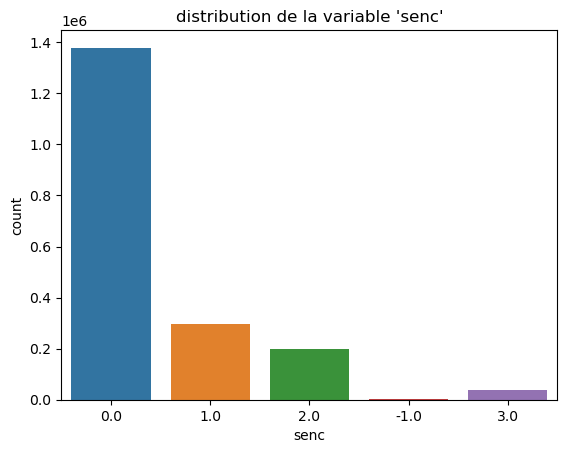

In [74]:
sns.countplot(x='senc',data=vehicule);
plt.title("distribution de la variable 'senc'")

Les valeurs 0, -1 et 3 n'apportent pas d'informations significatives et représentent la grande majorité des données.<br>
Les valeurs 1 et 2 indiquent la direction dans laquelle le véhicule se dirigeait(Paris-Orléans ou Orléans-Paris), plutôt que s'il se trouvait en sens contraire.<br>
<b>Avis métier</b> : Cette variable ne semble pas être pertinente pour la prédiction de la gravité. En effet, la direction du véhicule (Paris-Orléans ou Orléans-Paris) n'a pas d'importance tant que le véhicule se trouve du bon côté de la route.

<h2>Variable 'catv' : Catégorie de véhicule</h2><br>
descriptif des modalités :<br>
00 – Indéterminable<br>
01 – Bicyclette<br>
02 – Cyclomoteur <50cm3<br>
03 – Voiturette (Quadricycle à moteur carrossé) (anciennement "voiturette ou tricycle à moteur")<br>
04 – Référence inutilisée depuis 2006 (scooter immatriculé)<br>
05 – Référence inutilisée depuis 2006 (motocyclette)<br>
06 – Référence inutilisée depuis 2006 (side-car)<br>
07 – VL seul<br>
08 – Référence inutilisée depuis 2006 (VL + caravane)<br>
09 – Référence inutilisée depuis 2006 (VL + remorque)<br>
10 – VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC
<= 3,5T)<br>
11 – Référence inutilisée depuis 2006 (VU (10) + caravane)<br>
12 – Référence inutilisée depuis 2006 (VU (10) + remorque)<br>
13 – PL seul 3,5T <PTCA <= 7,5T<br>
14 – PL seul > 7,5T<br>
15 – PL > 3,5T + remorque<br>
16 – Tracteur routier seul<br>
17 – Tracteur routier + semi-remorque<br>
18 – Référence inutilisée depuis 2006 (transport en commun)<br>
19 – Référence inutilisée depuis 2006 (tramway)<br>
20 – Engin spécial<br>
21 – Tracteur agricole<br>
30 – Scooter < 50 cm3<br>
31 – Motocyclette > 50 cm3 et <= 125 cm3<br>
32 – Scooter > 50 cm3 et <= 125 cm3<br>
33 – Motocyclette > 125 cm3<br>
34 – Scooter > 125 cm3<br>
35 – Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé)<br>
36 – Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé)<br>
37 – Autobus<br>
38 – Autocar<br>
39 – Train<br>
40 – Tramway<br>
41 – 3RM <= 50 cm3<br>
42 – 3RM > 50 cm3 <= 125 cm3<br>
43 – 3RM > 125 cm3<br>
50 – EDP à moteur<br>
60 – EDP sans moteur<br>
80 – VAE<br>
99 – Autre véhicule<br>

In [75]:
vehicule['catv'].value_counts()

 7     1182228
 33     136738
 10     100574
 2       98409
 1       83565
 30      74315
 32      39488
 31      38736
 5       21816
 34      20219
 14      19109
 15      16378
 17      15327
 37      12332
 99       7878
 3        7566
 4        7463
 13       7243
 21       3942
 38       3316
 50       3029
 36       2401
 40       2180
 18       2075
 20       2073
 43       1383
 80       1113
 16        864
 0         757
 60        553
 35        506
 39        474
 9         300
 19        183
 8         120
 12         79
 42         65
 41         40
 6          39
 11         17
-1           9
Name: catv, dtype: int64

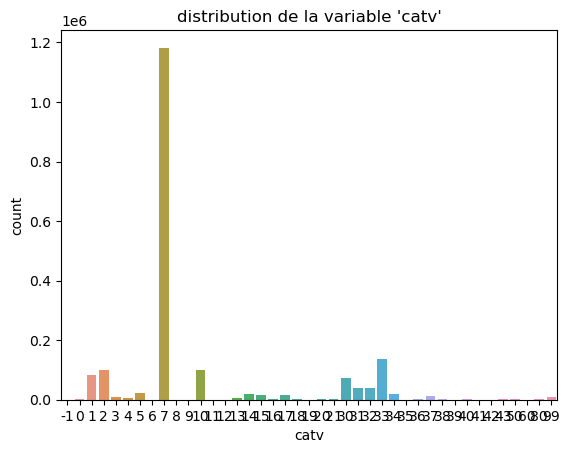

In [76]:
sns.countplot(x='catv',data=vehicule)
plt.title("distribution de la variable 'catv'");

La grande majorité des accidents concerne des véhicules légers, principalement des voitures. Il existe de nombreuses catégories définies, dont certaines ne sont plus utilisées. Il serait judicieux de simplifier <b>en regroupant certaines catégories</b>.

<h2>Variable 'obs' : Obstacle fixe heurté</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Sans objet<br>
1 – Véhicule en stationnement<br>
2 – Arbre<br>
3 – Glissière métallique<br>
4 – Glissière béton<br>
5 – Autre glissière<br>
6 – Bâtiment, mur, pile de pont<br>
7 – Support de signalisation verticale ou poste d’appel d’urgence<br>
8 – Poteau<br>
9 – Mobilier urbain<br>
10 – Parapet<br>
11 – Ilot, refuge, borne haute<br>
12 – Bordure de trottoir<br>
13 – Fossé, talus, paroi rocheuse<br>
14 – Autre obstacle fixe sur chaussée<br>
15 – Autre obstacle fixe sur trottoir ou accotement<br>
16 – Sortie de chaussée sans obstacle<br>
17 – Buse – tête d’aqueduc<br>

In [77]:
vehicule['obs'].value_counts()

 0.0     1660449
 1.0       41945
 13.0      32383
 2.0       27477
 4.0       22485
 3.0       21884
 6.0       21207
 8.0       20162
 14.0      14120
 12.0      11364
 16.0      10210
 15.0       9352
 9.0        6546
 7.0        4559
 11.0       4406
 5.0        2731
 10.0       2222
 17.0        298
-1.0          96
Name: obs, dtype: int64

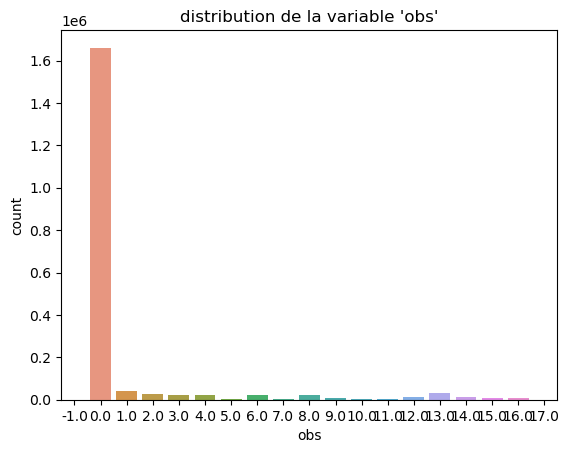

In [78]:
sns.countplot(x='obs',data=vehicule)
plt.title("distribution de la variable 'obs'");

La valeur 0 est définie comme "sans objet" et représente à elle seule 87% des occurrences.

<h2>Variable 'obsm' : Obstacle mobile heurté</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Aucun<br>
1 – Piéton<br>
2 – Véhicule<br>
4 – Véhicule sur rail<br>
5 – Animal domestique<br>
6 – Animal sauvage<br>
9 – Autre

In [79]:
vehicule['obsm'].value_counts()

 2.0    1286308
 0.0     399057
 1.0     194119
 9.0      27236
 6.0       3721
 4.0       1787
 5.0       1745
-1.0        151
Name: obsm, dtype: int64

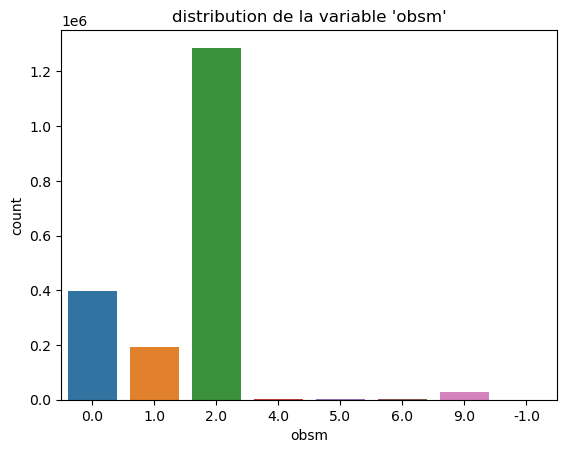

In [80]:
sns.countplot(x='obsm',data=vehicule)
plt.title("distribution de la variable 'obsm'");

In [110]:
pd.crosstab(vehicule.obs,vehicule.obsm)

obsm,-1.0,0.0,1.0,2.0,4.0,5.0,6.0,9.0
obs,,,,,,,,
-1.0,61,5,8,21,0,0,0,1
0.0,86,203238,187557,1238469,1625,1566,3191,25723
1.0,1,26148,3210,12261,21,21,15,268
2.0,0,25101,171,1943,4,26,135,97
3.0,0,15173,116,6391,9,18,54,123
4.0,0,16749,81,5493,8,15,36,103
5.0,0,2055,42,583,6,1,11,33
6.0,0,17232,491,3342,2,21,19,100
7.0,0,3087,80,1344,16,1,9,22


<b>Proposition</b> : fusionner les variables 'obs' et 'obsm' en une variable 'type d'obstacle heurté' en simplifiant la codification.

<h2>Variable 'choc' : Point de choc initial</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Aucun<br>
1 – Avant<br>
2 – Avant droit<br>
3 – Avant gauche<br>
4 – Arrière<br>
5 – Arrière droit<br>
6 – Arrière gauche<br>
7 – Côté droit<br>
8 – Côté gauche<br>
9 – Chocs multiples (tonneaux)<br>

In [82]:
vehicule['choc'].value_counts()

 1.0    704148
 3.0    275589
 2.0    224072
 4.0    181349
 8.0    139484
 0.0    127407
 7.0    116961
 6.0     64626
 5.0     50935
 9.0     29802
-1.0       132
Name: choc, dtype: int64

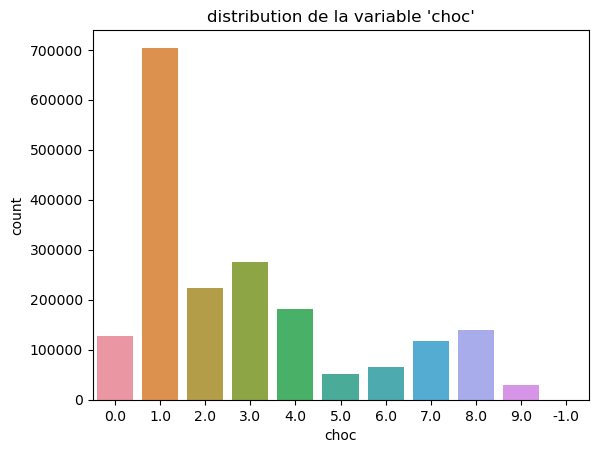

In [83]:
sns.countplot(x='choc',data=vehicule)
plt.title("distribution de la variable 'choc'");

Une modalité prédomine, qui est le choc par l'avant. Les autres modalités ont des occurrences du même ordre de grandeur.

<h2>Variable 'manv' : Manoeuvre principale avant l’accident</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Inconnue<br>
1 – Sans changement de direction<br>
2 – Même sens, même file<br>
3 – Entre 2 files<br>
4 – En marche arrière<br>
5 – A contresens<br>
6 – En franchissant le terre-plein central<br>
7 – Dans le couloir bus, dans le même sens<br>
8 – Dans le couloir bus, dans le sens inverse<br>
9 – En s’insérant<br>
10 – En faisant demi-tour sur la chaussée<br>
<b>Changeant de file</b><br>
11 – A gauche<br>
12 – A droite<br>
<b>Déporté</b><br>
13 – A gauche<br>
14 – A droite<br>
<b>Tournant</b><br>
15 – A gauche<br>
16 – A droite<br>
<b>Dépassant</b><br>
17 – A gauche<br>
18 – A droite<br>
<b>Divers</b><br>
19 – Traversant la chaussée<br>
20 – Manœuvre de stationnement<br>
21 – Manœuvre d’évitement<br>
22 – Ouverture de porte<br>
23 – Arrêté (hors stationnement)<br>
24 – En stationnement (avec occupants<br>
25 – Circulant sur trottoir<br>
26 – Autres manœuvres<br>

In [84]:
vehicule['manv'].value_counts()

 1.0     824971
 2.0     221934
 15.0    166701
 0.0     150328
 13.0     81512
 17.0     65310
 23.0     50743
 9.0      45670
 16.0     44553
 19.0     40293
 14.0     32330
 21.0     29930
 11.0     20627
 5.0      19835
 12.0     17916
 10.0     17557
 4.0      15469
 3.0      14704
 26.0      9946
 18.0      9673
 20.0      9307
 24.0      6868
 7.0       6827
 22.0      5689
 6.0       3846
 8.0       1016
 25.0       775
-1.0        104
Name: manv, dtype: int64

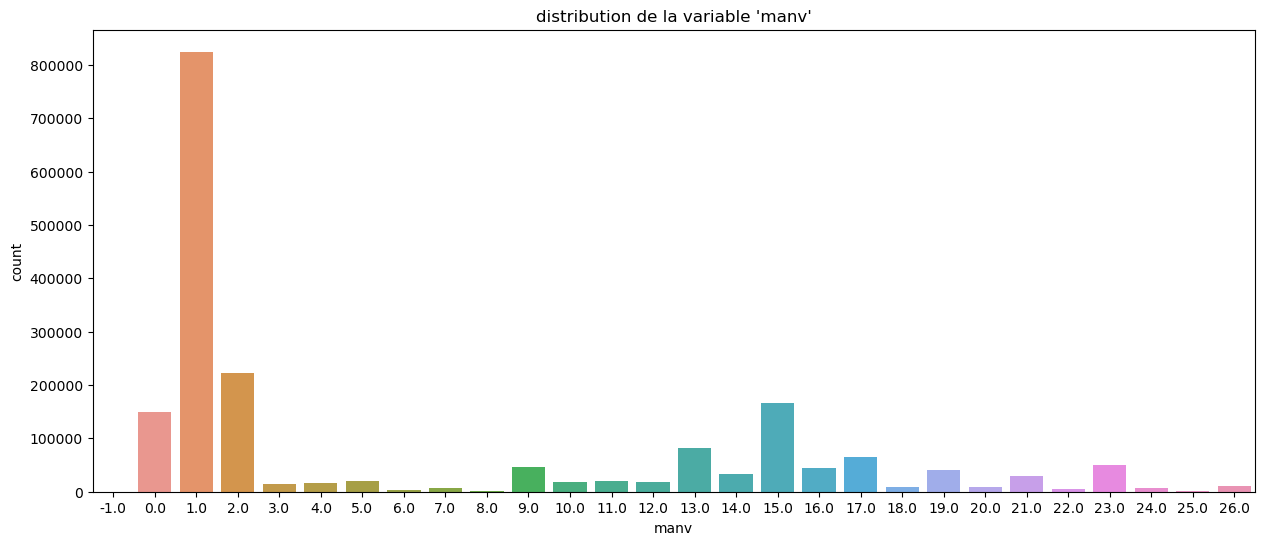

In [85]:
plt.figure(figsize=(15, 6))
sns.countplot(x='manv',data=vehicule)
plt.title("distribution de la variable 'manv'");

Une variable prédomine, le 'sans changement de direction'. Il semble possible de simplifier la codification en regroupant certaines manoeuvres.

<h2>Variable 'motor' : Type de motorisation du véhicule</h2><br>
descriptif des modalités :<br>
-1 – Non renseigné<br>
0 – Inconnue<br>
1 – Hydrocarbures<br>
2 – Hybride électrique<br>
3 – Electrique<br>
4 – Hydrogène<br>
5 – Humaine<br>
6 – Autre

In [86]:
vehicule['motor'].value_counts()

 1.0    227148
 0.0     24206
 5.0     14245
 3.0      6644
 2.0      3129
 6.0      2868
-1.0       694
 4.0       157
Name: motor, dtype: int64

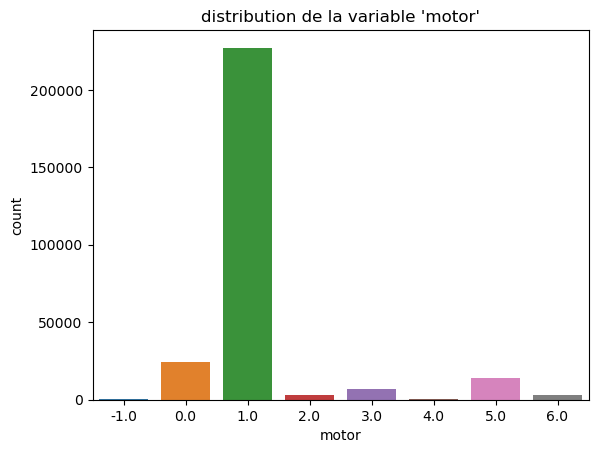

In [87]:
sns.countplot(x='motor',data=vehicule)
plt.title("distribution de la variable 'motor'");

Il est pas étonnant de remarquer la prédominance des motors à 'hydrocarbures'

<h2>Variable 'occutc' : Nombre d’occupants dans le transport en commun.</h2>

In [88]:
vehicule['occutc'].value_counts()

0.0      1624683
1.0         7079
2.0         1033
10.0         654
3.0          544
          ...   
97.0           1
73.0           1
102.0          1
82.0           1
78.0           1
Name: occutc, Length: 124, dtype: int64

0 représente plus de 80% des valeurs. 

<h2>Variable 'num_veh' : Numéro d'ordre du véhicule dans l'accident</h2>

Il n'y a aucune description de la variable 'num_veh' dans la documentation fournie avec le jeu de données. À première vue, cette variable semble représenter le numéro d'ordre du véhicule dans l'accident, mais nous n'avons aucune information pour déterminer s'il s'agit simplement d'un ordre d'enregistrement ou s'il a une signification particulière. Le caractère alphabétique pourrait éventuellement représenter un type de véhicule.<br>
Étant donné que notre intérêt se concentre sur les conséquences de l'accident sur les usagers, indépendamment du véhicule dans lequel ils se trouvaient, et compte tenu du manque d'informations sur la signification des codes, je propose de supprimer cette variable.

In [89]:
vehicule.drop('num_veh', axis=1, inplace=True)

<h1>Nettoyage du jeu de donnée</h1>

Il y a trop de valeurs manquantes dans la variable 'motor'. elle va être supprimée.

In [90]:
vehicule.drop('motor',axis=1, inplace=True)

In [91]:
columns = ['senc', 'obs', 'obsm', 'choc', 'manv']
for col in columns:
    vehicule[col].fillna(vehicule[col].mode()[0], inplace=True)

In [92]:
vehicule.isnull().sum()

num_acc         0
senc            0
catv            0
occutc     276834
obs             0
obsm            0
choc            0
manv            0
annee           0
dtype: int64

In [93]:
vehicule.duplicated().sum()

40774

Il n'y a pas de doublons dans ce jeu de données.

<h1>Relation entre les variables</h1>

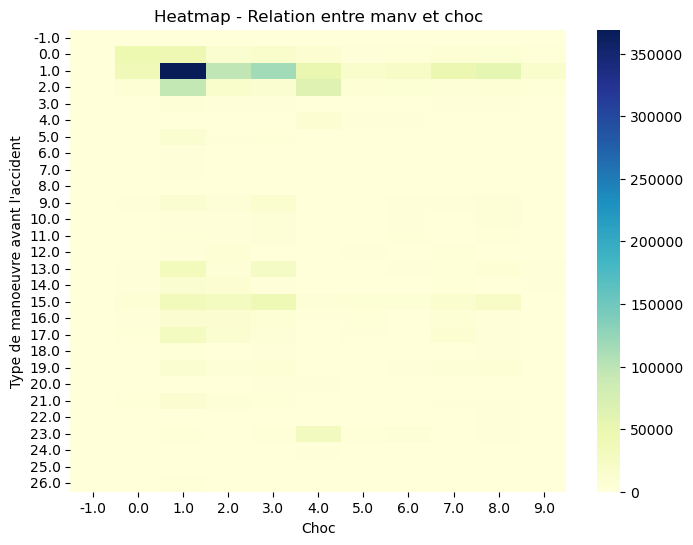

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.18956353559214228


In [106]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['manv'], vehicule['choc'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre manv et choc')
plt.xlabel('Choc')
plt.ylabel("Type de manoeuvre avant l'accident")
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

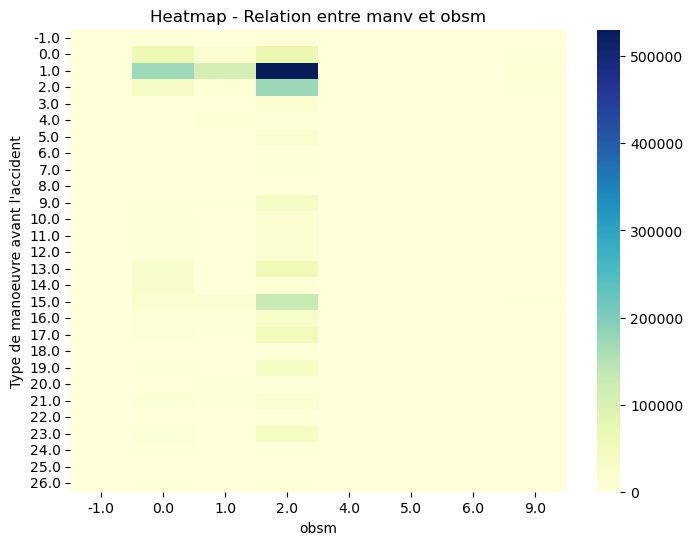

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.13738845015876988


In [108]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['manv'], vehicule['obsm'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre manv et obsm')
plt.xlabel('obsm')
plt.ylabel("Type de manoeuvre avant l'accident")
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

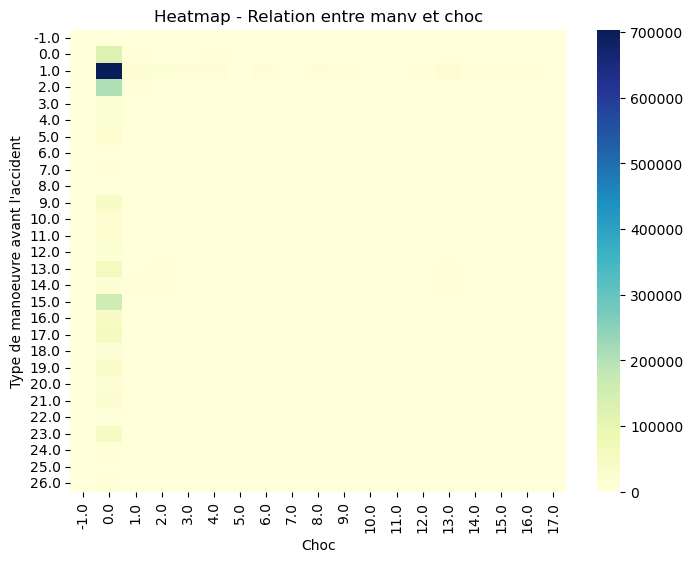

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.10631624072681159


In [109]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['manv'], vehicule['obs'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre manv et obs')
plt.xlabel('obs')
plt.ylabel("Type de manoeuvre avant l'accident")
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

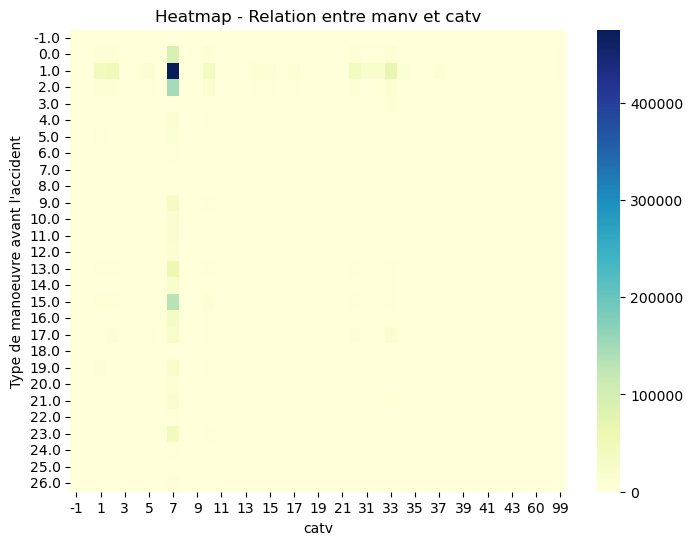

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.05528428550674391


In [111]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['manv'], vehicule['catv'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre manv et catv')
plt.xlabel('catv')
plt.ylabel("Type de manoeuvre avant l'accident")
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

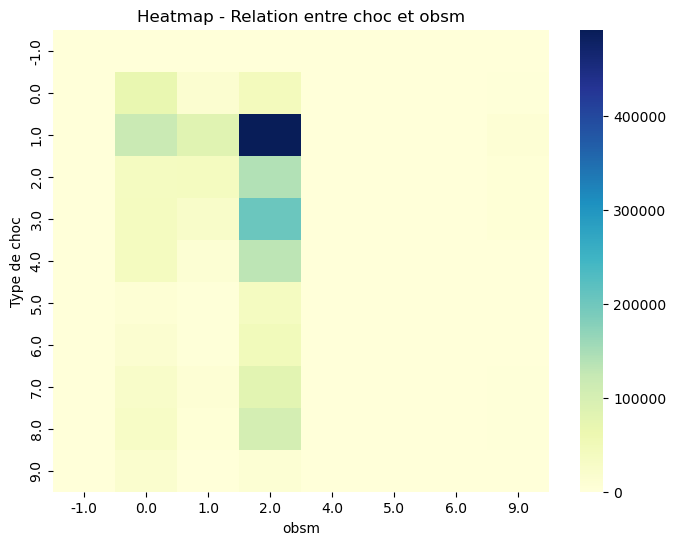

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.1482343814337001


In [112]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['choc'], vehicule['obsm'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre choc et obsm')
plt.xlabel('obsm')
plt.ylabel("Type de choc")
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

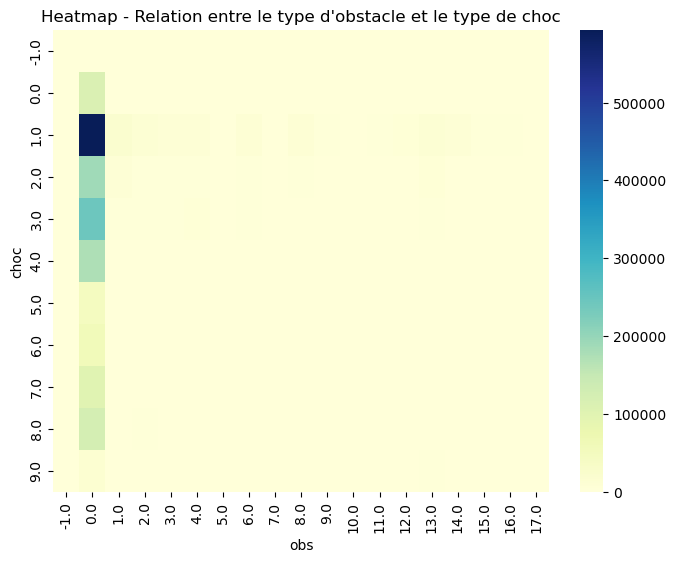

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.14206480006126498


In [114]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['choc'], vehicule['obs'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre le type d'obstacle et le type de choc")
plt.xlabel('obs')
plt.ylabel('choc')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

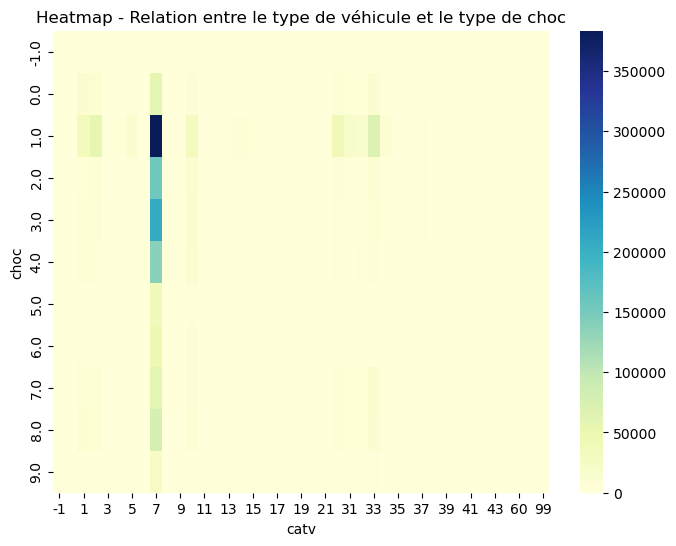

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.0677350279125561


In [115]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['choc'], vehicule['catv'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre le type de véhicule et le type de choc")
plt.xlabel('catv')
plt.ylabel('choc')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

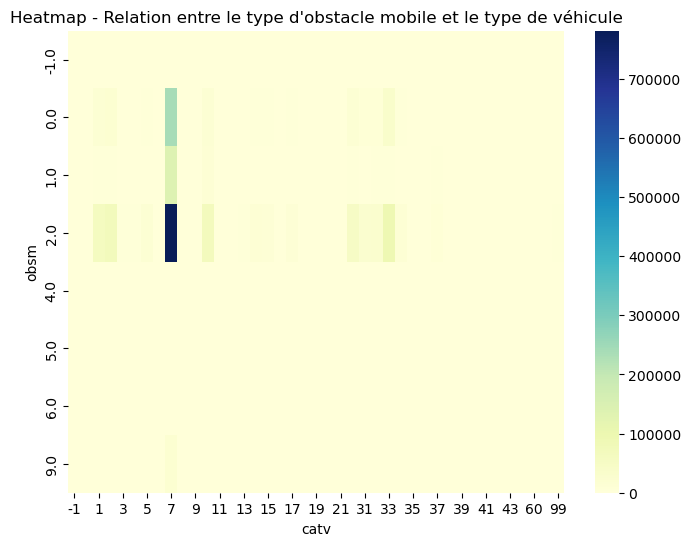

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.04118390646996613


In [116]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['obsm'], vehicule['catv'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre le type d'obstacle mobile et le type de véhicule")
plt.xlabel('catv')
plt.ylabel('obsm')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

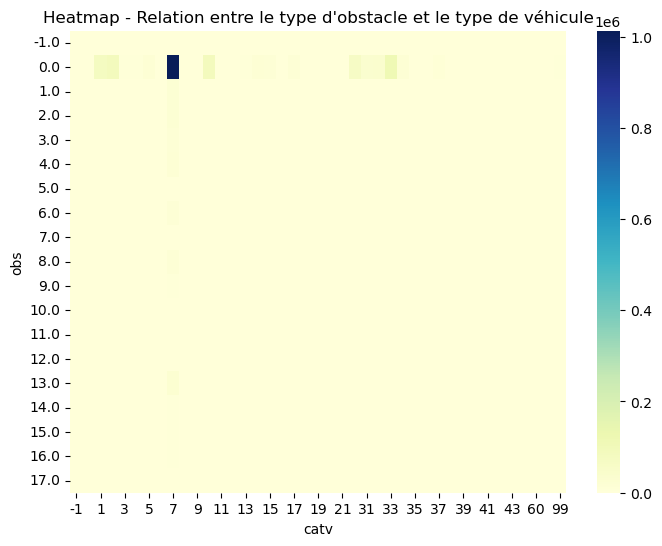

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.026782652893591635


In [117]:
# Création de la table de contingence
contingency_table = pd.crosstab(vehicule['obs'], vehicule['catv'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre le type d'obstacle et le type de véhicule")
plt.xlabel('catv')
plt.ylabel('obs')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

<h1>Relation avec la variable cible - A revoir</h1>

In [96]:
# Effectuer la fusion en utilisant la clé commune 'num_acc'
fusion = pd.merge(vehicule, usagers, on='num_acc')

# Afficher le résultat de la fusion
print(fusion.head())

        num_acc  senc catv  occutc  obs  obsm  choc  manv  annee_x  \
0  200500000001   0.0    7     0.0  0.0   2.0   1.0   1.0     2005   
1  200500000001   0.0    7     0.0  0.0   2.0   1.0   1.0     2005   
2  200500000001   0.0    7     0.0  0.0   2.0   1.0   1.0     2005   
3  200500000001   0.0    7     0.0  0.0   2.0   1.0   1.0     2005   
4  200500000001   0.0    7     0.0  0.0   2.0   1.0   1.0     2005   

   Unnamed: 0  ...  locp  actp  etatp  an_nais  num_veh  annee_y  id_vehicule  \
0           1  ...   0.0     0    0.0   1976.0      A01     2005          NaN   
1           2  ...   0.0     0    0.0   1968.0      B02     2005          NaN   
2           3  ...   0.0     0    0.0   1964.0      B02     2005          NaN   
3           4  ...   0.0     0    0.0   2004.0      B02     2005          NaN   
4           5  ...   0.0     0    0.0   1998.0      B02     2005          NaN   

  secu1  secu2  secu3  
0   NaN    NaN    NaN  
1   NaN    NaN    NaN  
2   NaN    NaN    Na

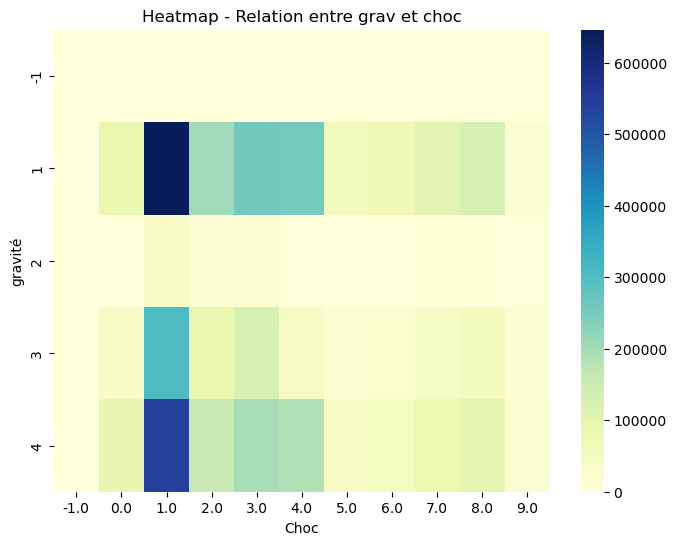

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.05835997824331901


In [97]:
# Création de la table de contingence
contingency_table = pd.crosstab(fusion['grav'], fusion['choc'])

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title('Heatmap - Relation entre grav et choc')
plt.xlabel('Choc')
plt.ylabel('gravité')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

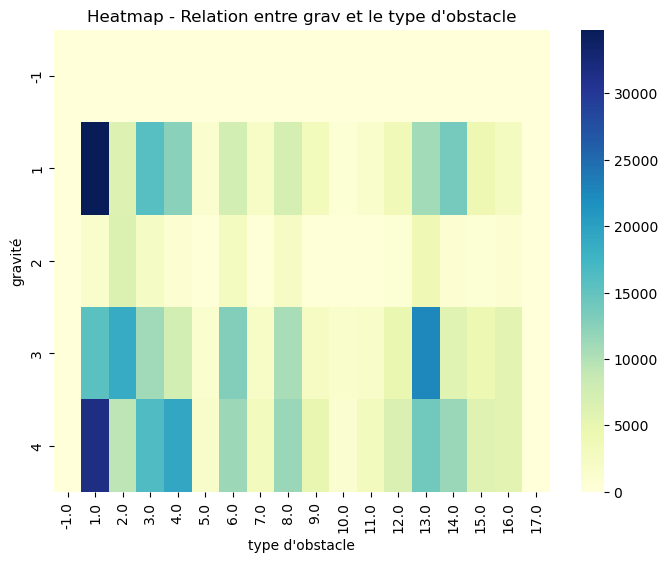

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.052405638156224725


In [98]:
# Création de la table de contingence
contingency_table = pd.crosstab(fusion['grav'], fusion[fusion['obs'] != 0.0].obs)

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre grav et le type d'obstacle")
plt.xlabel("type d'obstacle")
plt.ylabel('gravité')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

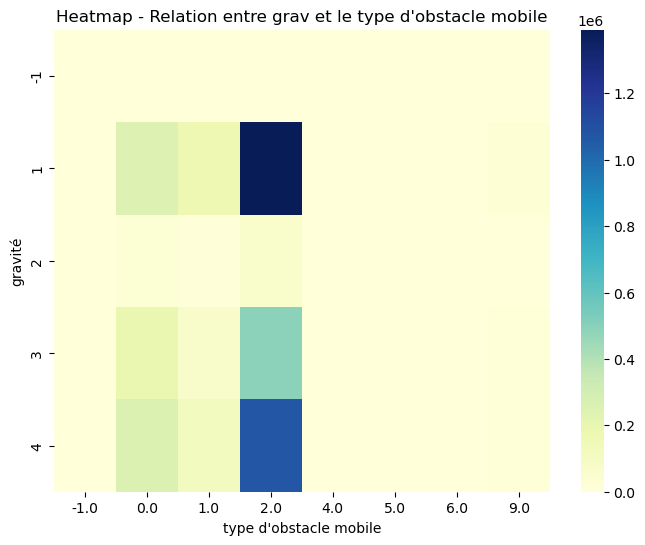

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.0628403918637635


In [100]:
# Création de la table de contingence
contingency_table = pd.crosstab(fusion['grav'], fusion.obsm)

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre grav et le type d'obstacle mobile")
plt.xlabel("type d'obstacle mobile")
plt.ylabel('gravité')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

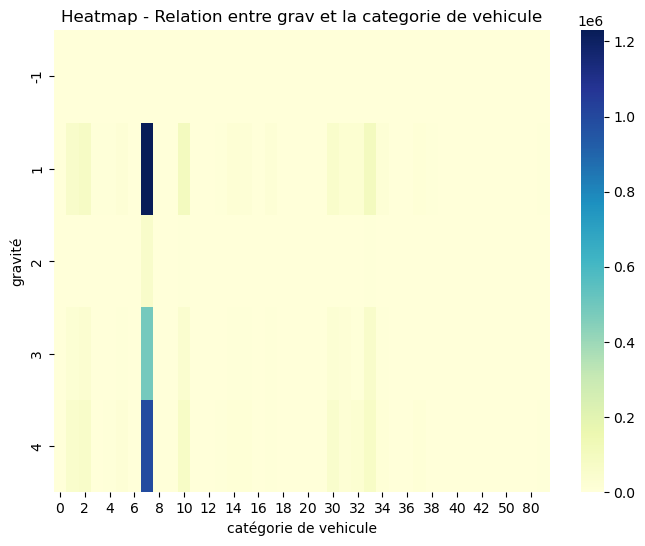

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.05251028328141147


In [102]:
# Création de la table de contingence
contingency_table = pd.crosstab(fusion['grav'], fusion.catv)

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre grav et la categorie de vehicule")
plt.xlabel("catégorie de vehicule")
plt.ylabel('gravité')
plt.show()

# Application du test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))

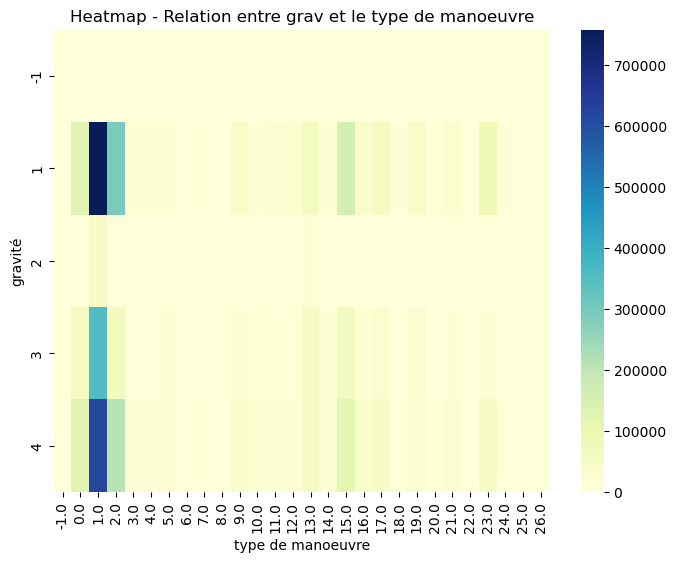

Résultats du test du Chi-carré:
p-value: 0.0
V de Cramer : 0.08042214525637857


In [103]:
# Création de la table de contingence
contingency_table = pd.crosstab(fusion['grav'], fusion.manv)

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, cmap='YlGnBu')
plt.title("Heatmap - Relation entre grav et le type de manoeuvre")
plt.xlabel("type de manoeuvre")
plt.ylabel('gravité')
plt.show()

# Test du Chi-carré
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Affichage des résultats
print('Résultats du test du Chi-carré:')
print('p-value:', p_value)
print('V de Cramer :', V_Cramer(contingency_table, fusion.shape[0]))